<a href="https://colab.research.google.com/github/sarraharrabi/ESPITA_Deeplearning/blob/main/D%C3%A9t%C3%A9ction_des_Cancer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

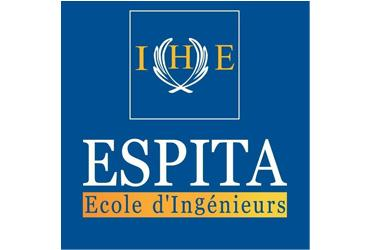

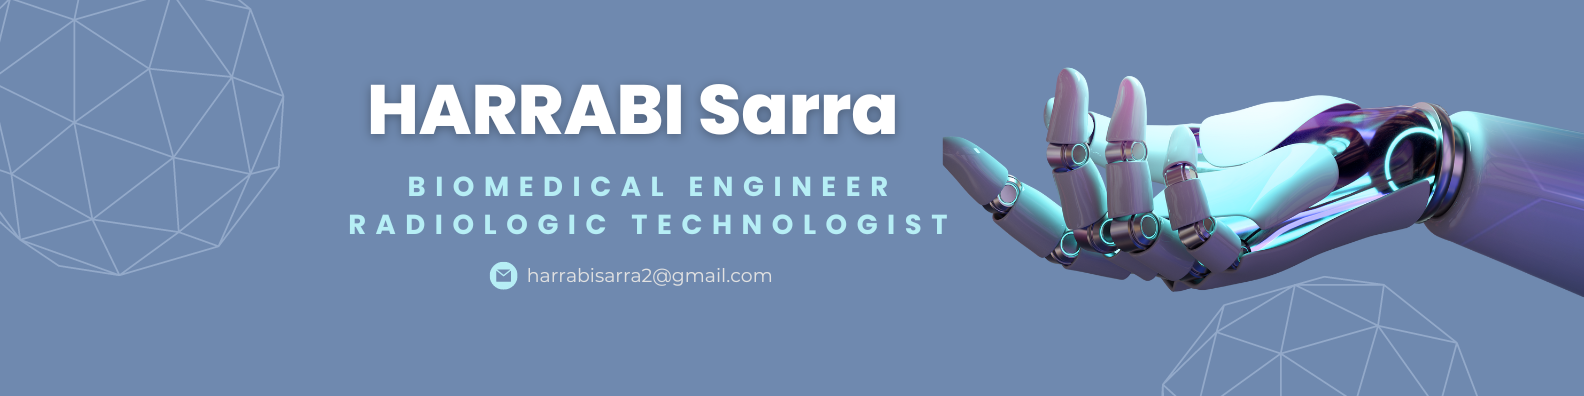

# Préparation de l'Environnement

In [1]:
pip install numpy

In [2]:
pip install pandas

In [3]:
pip install tensorflow

In [6]:
!pip install matplotlib
# courbe et visualisation

In [7]:
pip install seaborn

In [8]:
pip install opencv-python

**Détéction des Cancer des poumons**

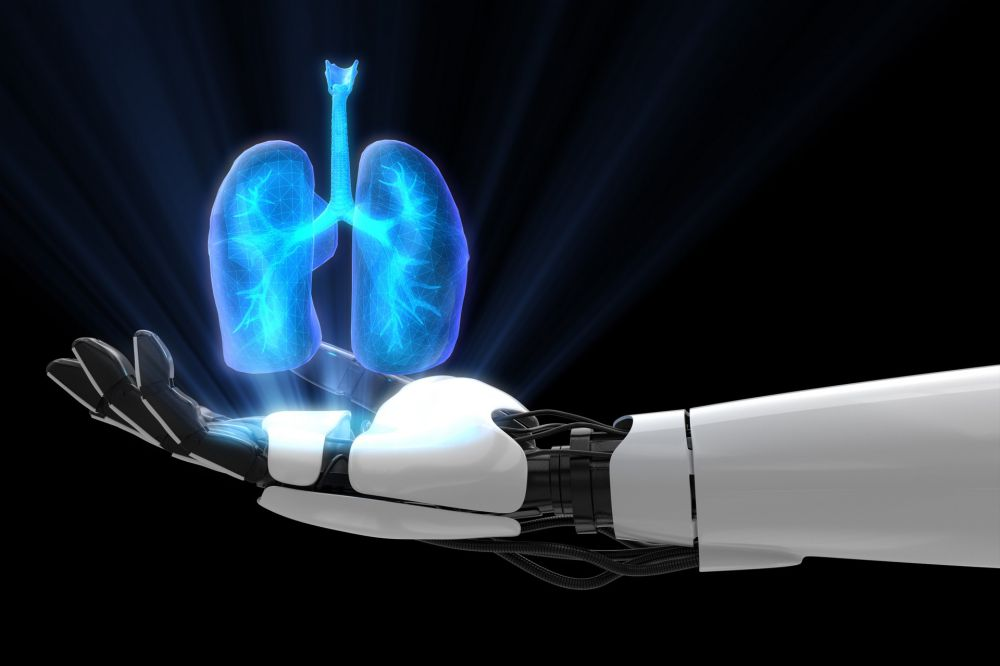

#Dataset : https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images/data

# 1.Importation des bibliothèques



In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf


# 2. importation de dataset

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data=("/content/drive/MyDrive/cancer des poumons/Data")

In [12]:
train_path_str='/content/drive/MyDrive/cancer des poumons/Data/train'

In [13]:
val_path_str='/content/drive/MyDrive/cancer des poumons/Data/valid'

In [14]:
test_path_str='/content/drive/MyDrive/cancer des poumons/Data/test'

In [15]:
import os #iblithoque qui lit entréé sortie
test_classes = os.listdir(test_path_str)

## 3.Pré-processing data

In [16]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout
#Conv2D:couche de convolution 2D pour extraire des caractérestiques des images
#Dense : couche de cnx
#MaxPooling2D:couche de sous échantillinnage qui réduit les dimensions
#Flatten :couche qui aplatit les données en entrées en un vecteur
#BatchNormalization :couche qui normalise les activations de la couche précédente
# Dropout : couche de régularisation pour prévenir le surapprentissage

In [17]:
from tensorflow.keras.models import Sequential  # Sequential : API pour créer des modèles en empilant des couches
from tensorflow.keras.applications import VGG16  # VGG16 : modèle de réseau de neurones convolutif pré-entraîné
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # ImageDataGenerator : classe pour augmenter les données d'image
from tensorflow.keras.applications.resnet import preprocess_input  # preprocess_input : fonction de prétraitement pour les modèles ResNet

import matplotlib.pyplot as plt  # Matplotlib : bibliothèque pour la création de visualisations
import cv2 as cv  # OpenCV : bibliothèque de vision par ordinateur

# Importation des outils de Scikit-learn pour le traitement et l'évaluation des données
from sklearn.utils import shuffle  # shuffle : fonction pour mélanger les ensembles de données
from sklearn.metrics import confusion_matrix, classification_report  # fonctions pour évaluer les modèles de classification

from keras.utils import to_categorical #fonction pour vonvertir des vecteur e classes en matrice de class binaire



In [18]:
#def de a forme des entrées de model
input_shape=(244,244,3) #les images sont 244*244 pixels avec 3 canaux de couleur RGB

In [19]:
#def de nombre de classe de sortie
num_classes=4

In [20]:
#configuration de générateur des images pour l'entrainement avec augmentation de données
trainGenerator=ImageDataGenerator(
    preprocessing_function=preprocess_input, # Use preprocess_input instead of process_input #prétraitement des img
    rotation_range=10,#rotation aléatoire des img dans un palge de 10 degree
    width_shift_range=0.3,#translation horizental des mg dans une plage de 30 degréé
    height_shift_range=0.3,#translation horizental des mg dans une plage de 30 degréé
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip= True, # Correct spelling of 'horizontal'
    vertical_flip=True,
    dtype='float32'
)

In [21]:
valgenerator=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    dtype='float32'
)

In [22]:
testGenerator=ImageDataGenerator(
    preprocessing_function=preprocess_input,
    dtype='float32'
)

In [23]:
train_data =trainGenerator.flow_from_directory(
    train_path_str,
    target_size=(244,244),
    batch_size=16,
    class_mode ='categorical'
)

Found 613 images belonging to 4 classes.


In [24]:
val_data=valgenerator.flow_from_directory(
    val_path_str,
    target_size=(244,244),
    batch_size=16,
    class_mode='categorical'
)

Found 72 images belonging to 4 classes.


In [25]:
test_data=testGenerator.flow_from_directory(
    test_path_str,
    target_size=(244,244),
    batch_size=16,
    class_mode='categorical'
)

Found 315 images belonging to 4 classes.


In [26]:
VGG16_model=VGG16( #va extraire les caractéristiques de l'image
    include_top=False, #ne pas inclure les couches de classification final
    weights='imagenet',#utlisiser les points pré_entrainées sur le dataset
    input_shape=input_shape
)

58889256/58889256 [==============================] - 3s 0us/step


In [27]:
for layer in VGG16_model.layers:
  layer.trainable=False

## 4.creation d'un modele

In [28]:
from keras import activations

#creation d'un modele séquentiel
model=Sequential()
#ajout du modèle vgg pré-entrainé dans la couche fully conncted
model.add(VGG16_model)

#ajouter une couche de normalisation par lots pour amélioerer la stabilité etla vitesse
model.add(BatchNormalization())

#ajouter une couche de pooling max pour réduire le dimesnsion e donneés
model.add(MaxPooling2D(pool_size=(2,2)))

#preparer les données à l'entrée pour fully connected
model.add(Flatten())
#premiere couche fully connected vec 10224 neurones activés par la foction relu
model.add(Dense(1024,activation='relu'))

model.add(Dropout(0.3)) #ajout d'une couche de régularisation avec un taux 30%

#deuxieme couche fully connected aevc 512 neurones activés par la fonction Relu
model.add(Dense(512,activation='relu'))

model.add(Dropout(0.3)) #ajout d'une couche de régularisation avec un taux 30%

#troisieme couche fully connected avec 512 neurones activés par la fonction Relu
model.add(Dense(128,activation='relu'))

#couche de sortie avec un nombre de neurones egal au nombre de classes , activée par softmax
model.add(Dense(num_classes,activation='softmax'))

model.summary() #affichage de model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 batch_normalization (Batch  (None, 7, 7, 512)         2048      
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 3, 512)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 1024)              4719616   
                                                                 
 dropout (Dropout)           (None, 1024)              0

In [29]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),# Arrête l'entraînement si la métrique surveillée ne s'améliore plus après 5 epochs
    tf.keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True),#sauvegarder le modele dans un ficheier model.h5
    tf.keras.callbacks.TensorBoard(log_dir='logs') # Enregistre les logs pour visualiser les métriques d'entraînement dans TensorBoard
]


In [30]:


# Compile the model
model.compile(optimizer='adam', # Choose an optimizer like Adam
              loss='categorical_crossentropy', # Use categorical crossentropy for multi-class classification
              metrics=['accuracy']) # Track accuracy during training

# Now you can fit the model
result = model.fit(train_data, validation_data=val_data, epochs=100, verbose=1)

Epoch 1/100
39/39 [==============================] - 316s 8s/step - loss: 1.9814 - accuracy: 0.4046 - val_loss: 1.1175 - val_accuracy: 0.5278
Epoch 2/100
39/39 [==============================] - 15s 376ms/step - loss: 1.1779 - accuracy: 0.4894 - val_loss: 0.9768 - val_accuracy: 0.4444
Epoch 3/100
39/39 [==============================] - 15s 378ms/step - loss: 1.0346 - accuracy: 0.5204 - val_loss: 0.9963 - val_accuracy: 0.4861
Epoch 4/100
39/39 [==============================] - 15s 396ms/step - loss: 0.9554 - accuracy: 0.5546 - val_loss: 0.9706 - val_accuracy: 0.4722
Epoch 5/100
39/39 [==============================] - 15s 387ms/step - loss: 0.9135 - accuracy: 0.5530 - val_loss: 0.9766 - val_accuracy: 0.5139
Epoch 6/100
39/39 [==============================] - 16s 405ms/step - loss: 0.8972 - accuracy: 0.5873 - val_loss: 0.9488 - val_accuracy: 0.4583
Epoch 7/100
39/39 [==============================] - 15s 383ms/step - loss: 0.8564 - accuracy: 0.6150 - val_loss: 1.0081 - val_accuracy: 0

In [32]:
loss, acc = model.evaluate(test_data,verbose = 1)

20/20 [==============================] - 184s 10s/step - loss: 0.4558 - accuracy: 0.8635


In [33]:
import seaborn as sns
predictions_prob = model.predict(test_data)
predictions = np.argmax(predictions_prob , axis = 1)
true_label = test_data.classes
report = classification_report(true_label,predictions)
print(report)

20/20 [==============================] - 4s 184ms/step
              precision    recall  f1-score   support

           0       0.41      0.48      0.44       120
           1       0.18      0.18      0.18        51
           2       0.19      0.19      0.19        54
           3       0.22      0.17      0.19        90

    accuracy                           0.29       315
   macro avg       0.25      0.25      0.25       315
weighted avg       0.28      0.29      0.28       315

